In [1]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras

2024-03-06 04:29:51.075871: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 04:29:51.189727: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 04:29:51.189795: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 04:29:51.189854: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 04:29:51.210971: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 04:29:51.213175: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

# EDA

Read in the CSV

In [2]:
df = pd.read_csv("./Thyroid_Diff.csv")
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [5]:
np.sum(df.duplicated().values)

19

In [3]:
# Get column names
columns = df.columns.tolist()

In [4]:
df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

## Feature Definitions

In [5]:
for column in columns:
    print("Unique values for column '{}': {}".format(column,np.unique(df[column].values)))

Unique values for column 'Age': [15 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 75 76 78 79 80 81 82]
Unique values for column 'Gender': ['F' 'M']
Unique values for column 'Smoking': ['No' 'Yes']
Unique values for column 'Hx Smoking': ['No' 'Yes']
Unique values for column 'Hx Radiothreapy': ['No' 'Yes']
Unique values for column 'Thyroid Function': ['Clinical Hyperthyroidism' 'Clinical Hypothyroidism' 'Euthyroid'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Unique values for column 'Physical Examination': ['Diffuse goiter' 'Multinodular goiter' 'Normal'
 'Single nodular goiter-left' 'Single nodular goiter-right']
Unique values for column 'Adenopathy': ['Bilateral' 'Extensive' 'Left' 'No' 'Posterior' 'Right']
Unique values for column 'Pathology': ['Follicular' 'Hurthel cell' 'Micropapillary' 'Papillary']
Unique values for column 'Focality': ['Mu

* __Age__: Age of the subject (Rounded to year, ages 15-82)
* __Gender__: Biological sex (Female and Male) of the subject
* __Smoking__: Current smoking status (No or Yes)
* __Hx Smoking__: Smoking history (No or Yes)
* __Hx Radiotherapy__: Radiation therapy to the head and neck region (No or Yes)
* __Thyroid Function__: Classified as euthyroid, clinical hypo/hyperthyroidism, or subclinical hypo/hyperthyroidism [0-4]
* __Physical Examination__: Presence of goiter - diffuse, single nodular goiter on the left or right lobe, multinodular, or normal [0-4]
* __Adenopathy__: Presence of adenopathy (large or swollen lymph glands) - No adenopathy, anterior right, anterior left, bilateral, posterior, or extensive (all) [0-5]
* __Pathology__: Pathological subtype of cancer - papillary, micropapillary, follicular, Hurthle cell [0-3]
* __Focality__: Unifocal or multifocal [0-1]
* __Risk__: Risk assessment according to ATA guidlines (low, intermediate, high) [0-2]
* __T__: T describes the size of the tumor and any spread of cancer into nearby tissue - T1a, T1b, T2, T3a, T3b, T4a, T4b [0-6]
* __N__: N describes the spread of cancer to nearby lymph nodes - N0 N1a N1b [0-2]
* __M__: M describes metastasis (spread of cancer to other parts of the body) - M0, M1 [0-1]
* __Stage__: Final cancer stage - I, II, III, IVa, IVb [0-4]
* __Response__: Treatment response - Excellent, Indeterminate, Biochemical incomplete, Structural incomplete [0-3]
* __Recurred__: Cancer recurrance (True or False)

## Analysis

<Axes: xlabel='Age', ylabel='Count'>

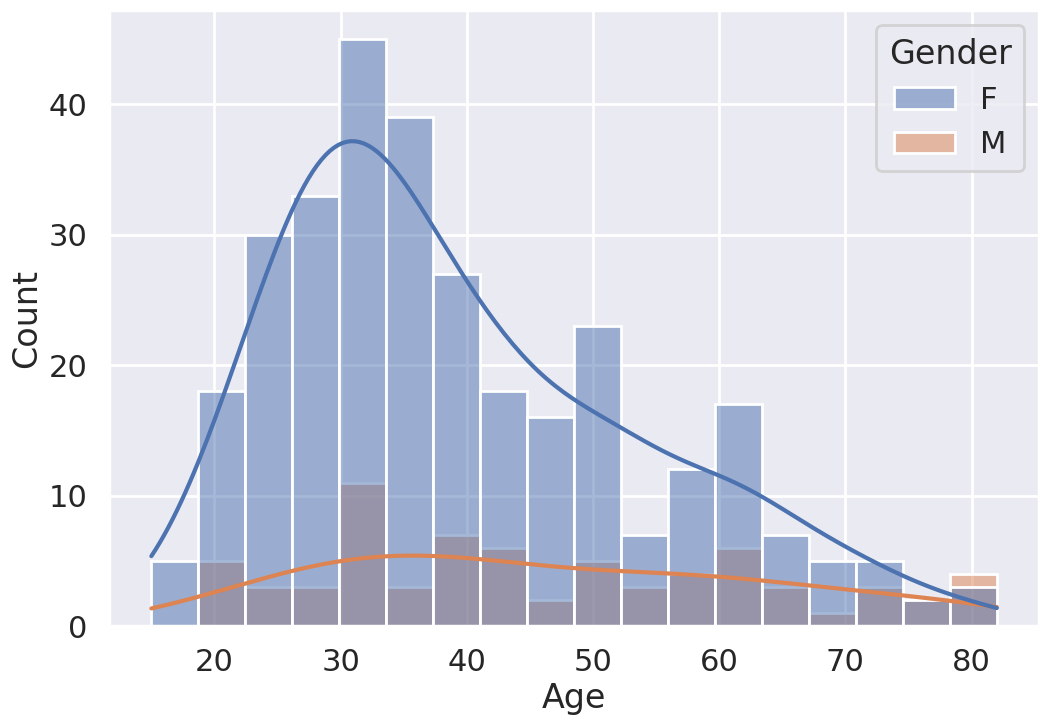

In [6]:
# sns.set_style("whitegrid")
sns.set_theme()
sns.set_context("poster")
plt.figure(figsize=(12,8))
sns.histplot(df, x="Age", hue="Gender", kde=True, bins=18, palette='deep')

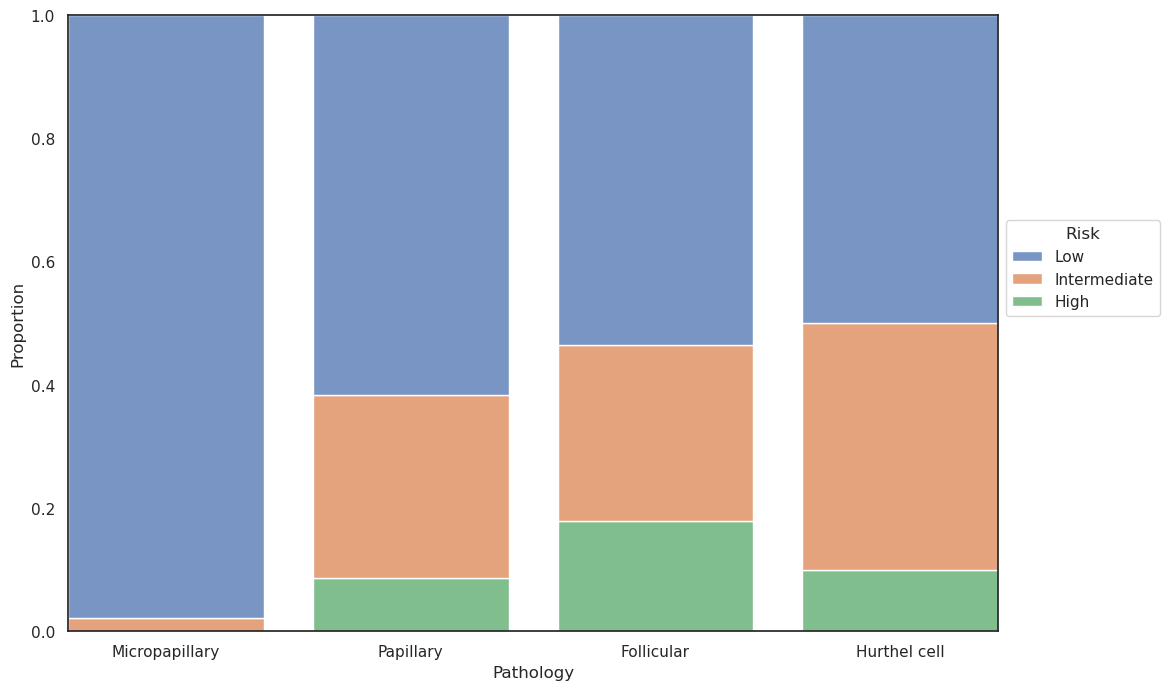

In [7]:

plt.figure(figsize=(12,8))
sns.set_theme()
sns.set_style("white")
# sns.axes_style("ticks")
ax = sns.histplot(df,x='Pathology',hue='Risk',multiple='fill', stat='proportion', discrete=True, shrink=0.8)
sns.move_legend(ax, "lower left", bbox_to_anchor=(1, 0.5))

Text(0.5, 1.0, 'Age Distribution by Cancer Stage')

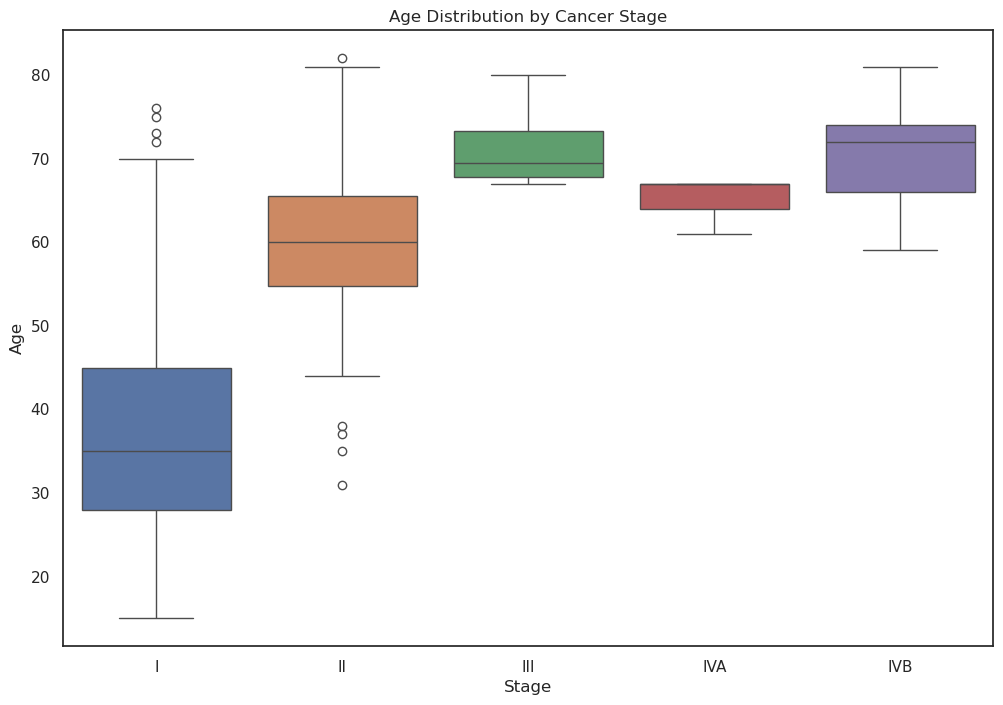

In [8]:
plt.figure(figsize=(12,8))
sns.set_theme()
sns.set_style("white")
sns.boxplot(df.sort_values("Stage"),x="Stage",y="Age",hue="Stage");
plt.title("Age Distribution by Cancer Stage")

Text(0.5, 1.0, 'Recurrance by Age')

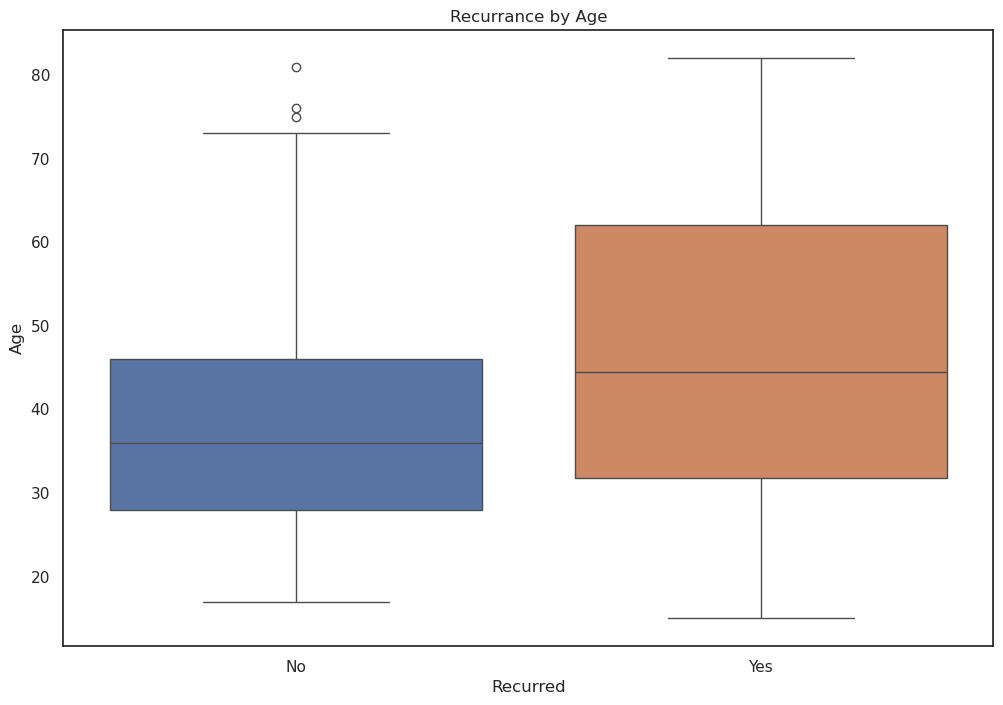

In [9]:
plt.figure(figsize=(12,8))
sns.set_theme()
sns.set_style("white")
sns.boxplot(df,x="Recurred",y="Age",hue="Recurred");
plt.title("Recurrance by Age")

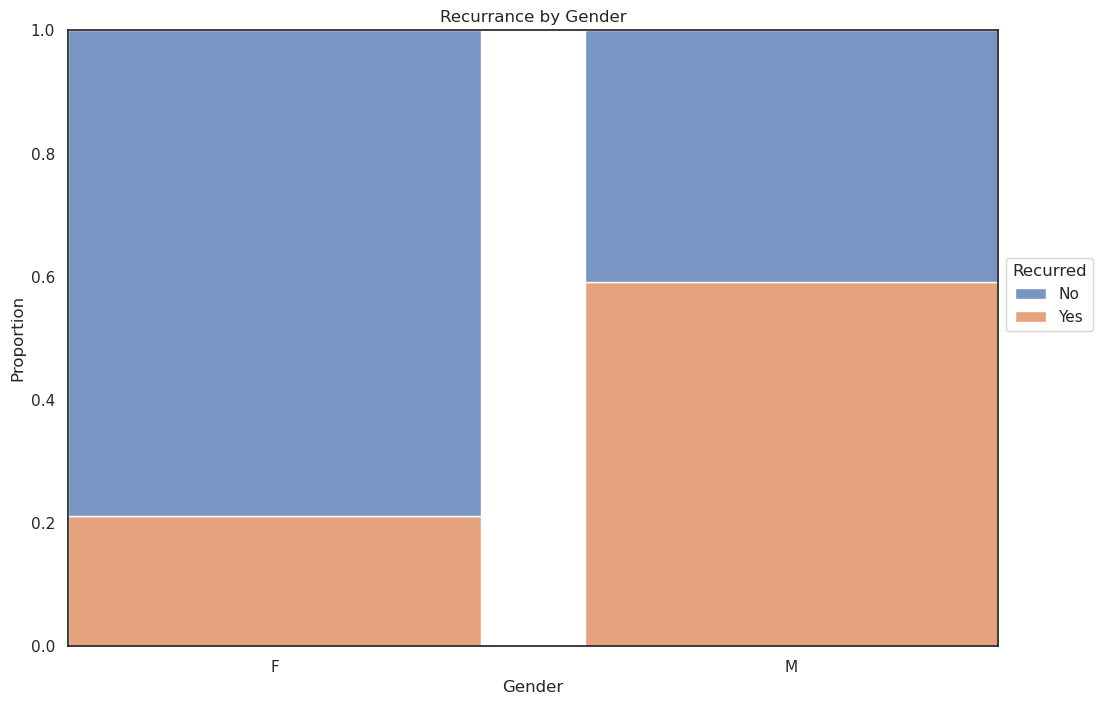

In [10]:
plt.figure(figsize=(12,8))
sns.set_theme()
sns.set_style("white")
ax = sns.histplot(df,x='Gender',hue='Recurred',multiple='fill', stat='proportion', discrete=True, shrink=0.8)
sns.move_legend(ax, "lower left", bbox_to_anchor=(1, 0.5))
plt.title("Recurrance by Gender");

Males have a much higher recurrance rate

## Encoding Data

In [11]:
le = LabelEncoder()
cat_columns = df.select_dtypes(include=['object']).columns
for column in cat_columns:
    df[column] = le.fit_transform(df[column])
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1


Clean and format data

In [12]:
# Drop any rows with NA
df = df.dropna()

# See how many examples we have left
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1


No NAs in the data (as expected)

## Correlation Heatmap

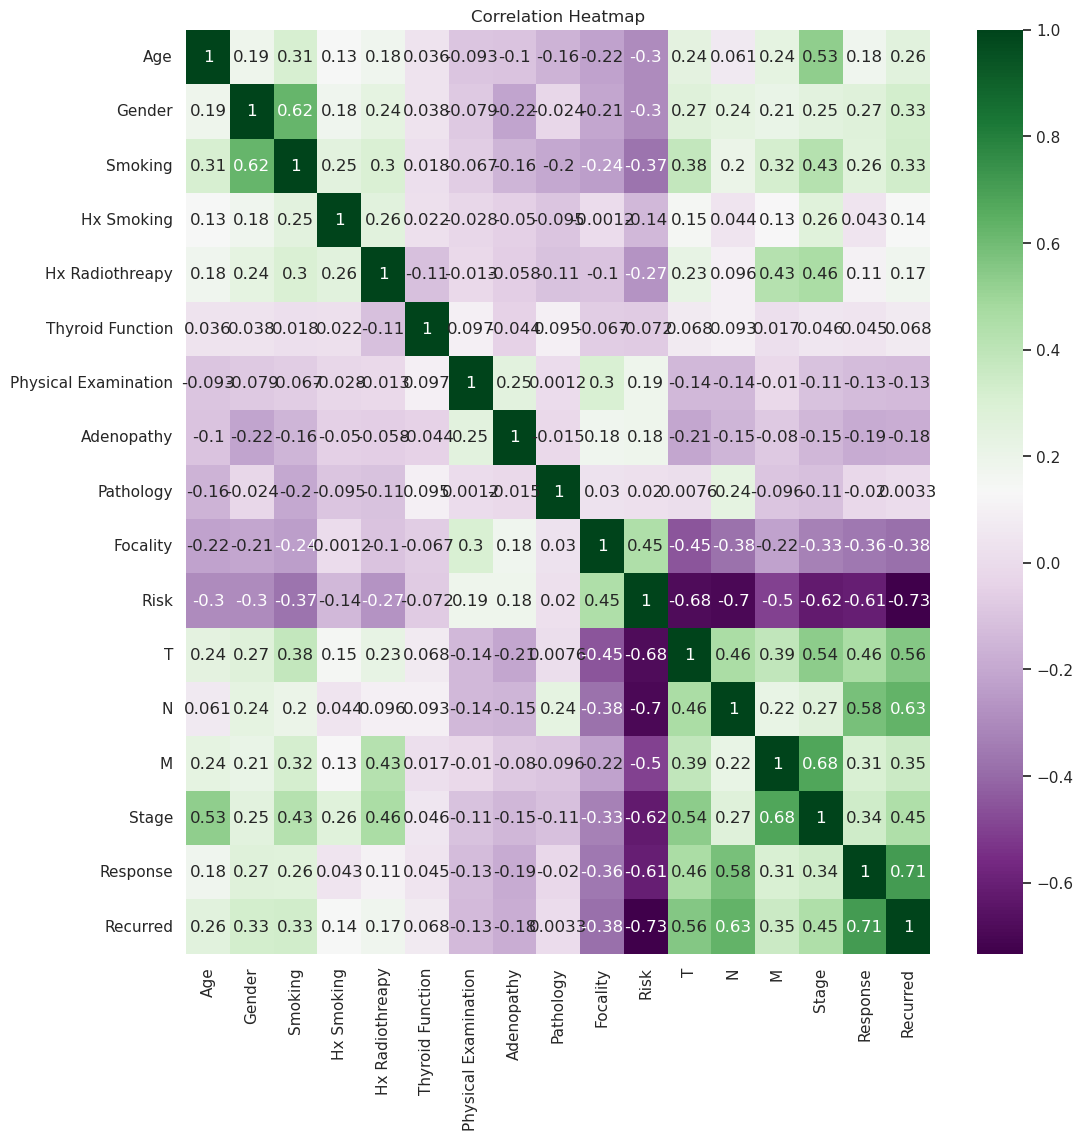

In [20]:
plt.figure(figsize=(12,12))
sns.set_theme()
sns.heatmap(df.corr(), annot=True, cmap='PRGn')
plt.title("Correlation Heatmap")
sns.set(font_scale=2.5)